In [1]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv','geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv','order_items')# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='IshVithebabe$$1505',
    database='e_commerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/DELL/Desktop/e-commerce sales/archive (1)'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [3]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import mysql.connector

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='IshVithebabe$$1505',
    database='e_commerce'
)
cur = conn.cursor()

In [3]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

#Basic Queries
#1. List all unique cities where customers are located.

query = """ select distinct (customer_city) from customers """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df.head()


,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


#2. Count the number of orders placed in 2017.

In [4]:
query = """ select count(order_id) from orders where order_purchase_timestamp = 2017 """
cur.execute(query)
data = cur.fetchall()
'Total orders placed in 2017',data[0][0]

('Total orders placed in 2017', 45101)

#3. Find the total sales per category.

In [5]:
query = """ select upper((products.product_category)) as category ,round(sum(payments.payment_value),2)as total_sales
from products join order_items 
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category","Sales"])
df

,Category,Sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


#4. Calculate the percentage of orders that were paid in installments.

In [6]:
query = """ select sum(case when payment_installments >=1 then 1 else 0 end)/count(*)*100 
as percentage_of_orders_in_installment from payments; """
cur.execute(query)
data = cur.fetchall()
'The percentage of orders paid in installments',data[0][0]

('The percentage of orders paid in installments', Decimal('99.9981'))

5. Count the number of customers from each state. 

<function matplotlib.pyplot.show(close=None, block=None)>

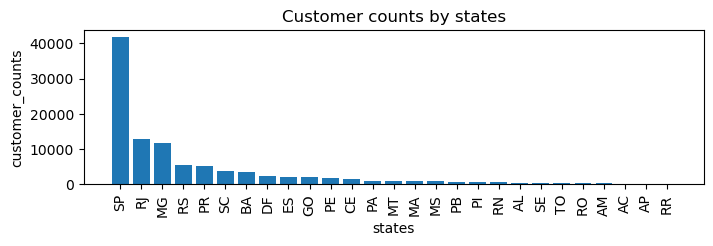

In [7]:
import matplotlib.pyplot as plt

query = """ select (customers.customer_state)as state, count(customer_id) 
from customers
group by state; """
cur.execute(query)
data = cur.fetchall()
data

df = pd.DataFrame(data, columns = ["states","customer_counts"])
df = df.sort_values(by = "customer_counts", ascending = False)

plt.figure(figsize = (8,2))
plt.bar(df["states"],df["customer_counts"])
plt.xticks(rotation = 90)
plt.xlabel("states")
plt.ylabel("customer_counts")
plt.title("Customer counts by states")
plt.show

#intermediate queries

##calculate the number of orders per month in 2018


[Text(0, 0, '7269'),
 Text(0, 0, '6728'),
 Text(0, 0, '7211'),
 Text(0, 0, '6939'),
 Text(0, 0, '6873'),
 Text(0, 0, '6167'),
 Text(0, 0, '6292'),
 Text(0, 0, '6512'),
 Text(0, 0, '4')]

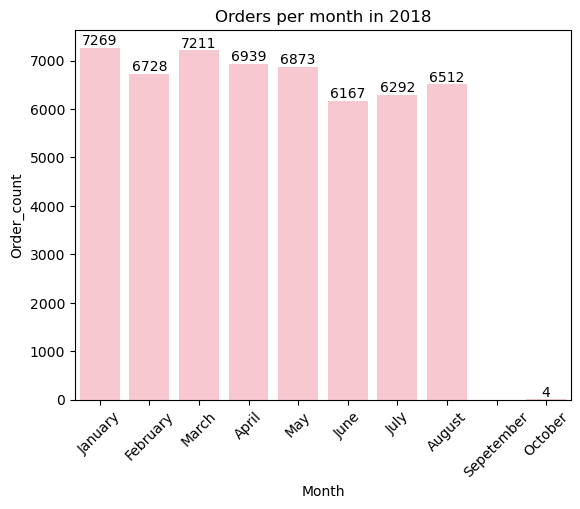

In [8]:

query = """ select monthname(order_purchase_timestamp) as month ,count(order_id)
from orders
where year(order_purchase_timestamp) = 2018
group by month; """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Month","Order_count"])
df

ord = ["January","February","March","April","May","June","July","August","Sepetember","October"]

plt.xticks(rotation = 45)

ax = sns.barplot(x = df["Month"],y = df["Order_count"],data = df , order = ord, color = "pink")
plt.title("Orders per month in 2018")
ax.bar_label(ax.containers[0])

#find the average number of products per order, grouped by customer city.

In [9]:

query = """ with count_per_order as
(select orders.customer_id ,orders.order_id, count(order_items.order_id) as oc
from orders join order_items
on order_items.order_id = orders.order_id
group by orders.customer_id ,orders.order_id)

select customers.customer_city, round(avg(count_per_order.oc),2) as average_orders
from customers join count_per_order 
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by average_orders desc"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Customer City ","Average orders"])
df.head(5)


,Customer City,Average orders
0,padre carvalho,7.00
1,celso ramos,6.50
2,candido godoi,6.00
3,datas,6.00
4,matias olimpio,5.00


-- calculate the percentage of total revenue contribution by each product category.

<function matplotlib.pyplot.show(close=None, block=None)>

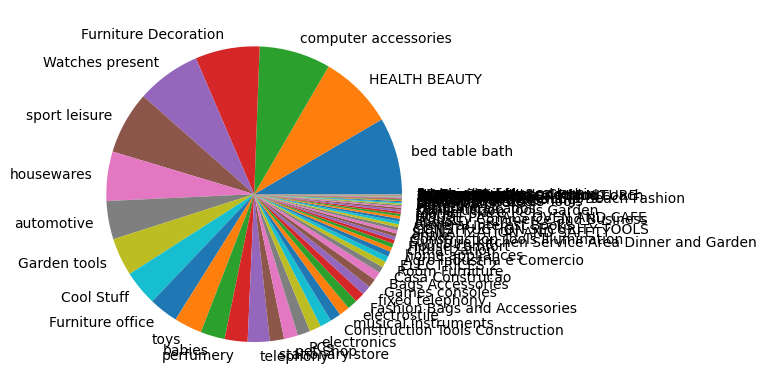

In [10]:
query = """ select (products.product_category) category,
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) as total_percentage_revenue 
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category
order by total_percentage_revenue desc """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data , columns = ["Category" ,"Percentage Contribution in revenue"])
df.head(5)

plt.pie(df["Percentage Contribution in revenue"],labels =  df["Category" ])
plt.show

 4.identify the correlation between product price and the number of times a product has been purchased

In [11]:
import numpy as np

query = """ select (products.product_category) category,
count(order_items.product_id) as count,
round(avg(order_items.price),2) as average_price
from products join order_items
on products.product_id = order_items.product_id
group by category """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data , columns = ["Category" ,"Counts","Average_price"])
df.head(5)

arr1 = df["Counts"]
arr2 =df["Average_price"]
a = np.corrcoef([arr1],[arr2])

print("The correlation between price and the number of times a product has been purchased", a[0][1])

The correlation between price and the number of times a product has been purchased -0.10631514167157562


there is no correlation between counts and average_price

# calculate the total revenue generated by each seller and rank them by revenue

<function matplotlib.pyplot.show(close=None, block=None)>

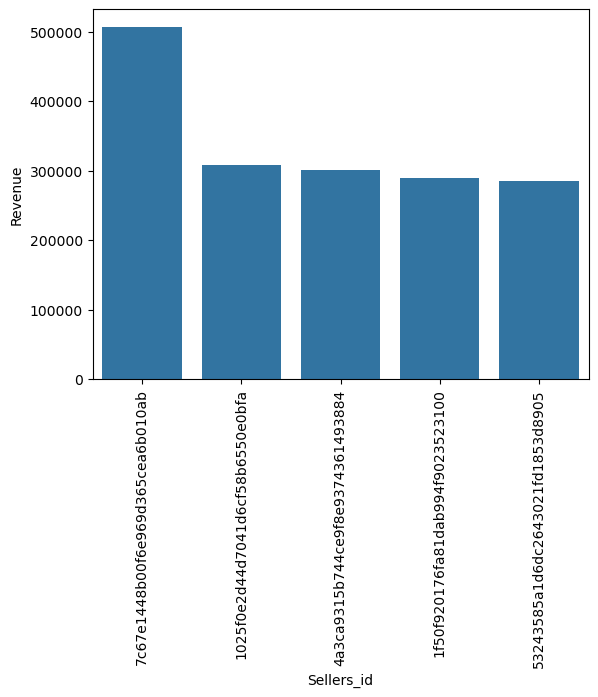

In [12]:
query = """select *,dense_rank() over(order by total_revenue desc) as rn
from
(select order_items.seller_id ,sum(payments.payment_value) as total_revenue
from order_items join payments
on payments.order_id = order_items.order_id
group by  order_items.seller_id ) as a """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Sellers_id","Revenue","Rank"])
df = df.head()
a
sns.barplot(data = df , x = "Sellers_id",y = "Revenue")
plt.xticks(rotation = 90)
plt.show

-- calculate the moving average of orders values for each customer over their order history

In [13]:
query = """ select customer_id , order_purchase_timestamp,payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from 
(select orders.customer_id, orders.order_purchase_timestamp, 
(payments.payment_value)as payment
from payments join orders
on payments.order_id = orders.order_id) as a; """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Customer ID","Order purchase Time","Payment","Mov_avg"])
df.head(10)

,Customer ID,Order purchase Time,Payment,Mov_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
5,0004164d20a9e969af783496f3408652,2017-04-12 08:35:12,71.80,71.800003
6,000419c5494106c306a97b5635748086,2018-03-02 17:47:40,49.40,49.400002
7,00046a560d407e99b969756e0b10f282,2017-12-18 11:08:30,166.59,166.589996
8,00050bf6e01e69d5c0fd612f1bcfb69c,2017-09-17 16:04:44,85.23,85.230003
9,000598caf2ef4117407665ac33275130,2018-08-11 12:14:35,1255.71,1255.709961


# calculate the cumulative sales per month for each year.

In [14]:
query = """ select years,months,payment,sum(payment)
over(order by years,months) as cumulative_sales
from
(select year(orders.order_purchase_timestamp) as years,
monthname(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) payment from orders join payments
on orders.order_id = payments.order_id
group by years, months order by years, months desc) as a """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years","months","Payment","cumulative_sales"])
df.head(10)

,years,months,Payment,cumulative_sales
0,2016,December,19.62,19.62
1,2016,October,59090.48,59110.10
2,2016,September,252.24,59362.34
3,2017,April,417788.03,477150.37
4,2017,August,674396.32,1151546.69
5,2017,December,878401.48,2029948.17
6,2017,February,291908.01,2321856.18
7,2017,January,138488.04,2460344.22
8,2017,July,592382.92,3052727.14
9,2017,June,511276.38,3564003.52


In [15]:
# calculate year-over-year growth rate of total sales

query = """select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) payment from orders join payments
on orders.order_id = payments.order_id
group by years order by years;"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Years","Sales"])
df


,Years,Sales
0,2016,59362.34
1,2017,7249746.73
2,2018,8699763.05


# calculate year-over-year growth rate of total sales


In [16]:
query = """with a as 
(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) payment from orders join payments
on orders.order_id = payments.order_id
group by years order by years) 

select years, 
(payment - lag(payment ,1) over(order by years))/lag(payment ,1) over(order by years)*100
from a;"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Years","YOY % Sales"])
df

,Years,YOY % Sales
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


#Calculate the retension rate of customers ,defined as a percentage of customers who makes another purchase within 6 months of their 1st purchase.

In [17]:
query = """with a as(select customers.customer_id , min(orders.order_purchase_timestamp) as first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) as next_order
from a join orders
on a.customer_id = orders.customer_id
and orders.order_purchase_timestamp>first_order
and orders.order_purchase_timestamp < date_add(first_order ,interval 6 month)
group by a.customer_id)

select 100 * (count(distinct a.customer_id)/count(distinct b.customer_id))
from a left join b
on a.customer_id = b.customer_id """
cur.execute(query)
data = cur.fetchall()
data

[(None,)]

We have no repeated customers so the value here is null or none

In [ ]:
-- Identify the top 3 customers who spends most money in each year.

<function matplotlib.pyplot.show(close=None, block=None)>

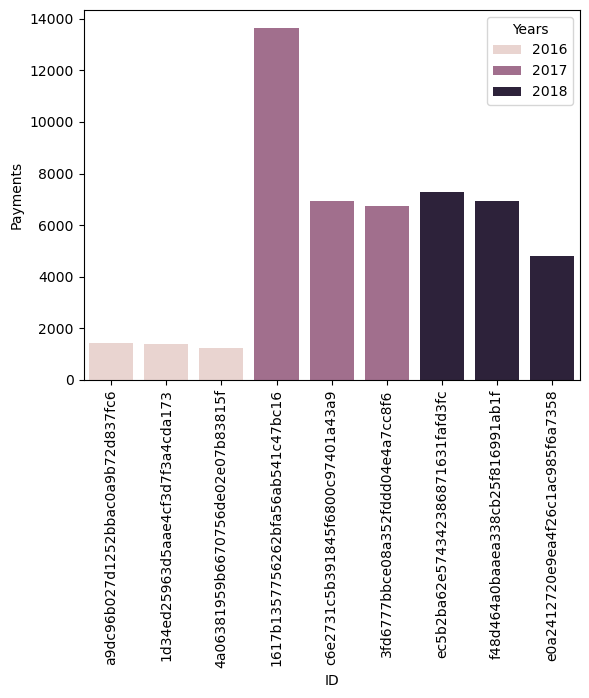

In [25]:
query = """ select years,customer_id,payment,d_rank
from
(select year(orders.order_purchase_timestamp) as years,
orders.customer_id ,
sum(payments.payment_value) as payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp) order by sum(payments.payment_value) desc ) d_rank 
from orders join payments
on orders.order_id = payments.order_id 
group by orders.customer_id ,years) as a
where d_rank <=3; """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Years","ID","Payments","Rank"])
sns.barplot(x = "ID",y="Payments",data = df,hue ="Years")
plt.xticks(rotation = 90)
plt.show
                  